<a href="https://colab.research.google.com/github/tsakailab/prml/blob/master/ipynb/ex_CrossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 交差検証（cross validation）

----

氏名：

学生番号：

----
基本課題（必須）

    1. Example 5 のデータ集合を決定木で識別するとき，決定木の深さ 'max_depth' を
       どの程度の値に設定すべきか交差検証してください．
       交差検証の結果における評価値の平均と標準偏差も確認し，同じ交差検証を何度か実施したときに
       得られる最良のモデルにはどの程度の再現性があるかについても考察してください．

（ここに回答を書いてください）



    2. Example 6 のデータ集合を非線形SVM（SVC(kernel='rbf')）で識別するとき，
       損失の重み 'C' とカーネルの係数 'gamma' をどの程度の値に設定すべきか交差検証してください．
       また，'C' と 'gamma' の役割を説明し，それぞれ最適な値から大き過ぎる・小さ過ぎるとき，
       どのような決定境界が作られる傾向があるか，実験的に考察してください．

（ここに回答を書いてください）



    3. Example 5 または Example 6 のデータ集合は，正のクラスの数が少なく，クラスのデータ数が不均衡です．
       識別器の学習に置いて，クラスの不均衡がもたらす問題点と，影響を受ける評価値について説明してください．

（ここに回答を書いてください）



    4.その他，気づいたこと，調べたことを書いてください．

（ここに回答を書いてください）



----
発展課題（任意）がこのノートブックの後半にあります．

## モデル評価のためにデータ集合を分割する様々な方法を学びましょう．

In [ ]:
# dummy dataset
import numpy as np
X_all = - (np.arange(10)+10)
y_all = np.arange(10)+10

# context to show +/- of numpy int entries in print
pm = lambda: np.printoptions(formatter={'int': lambda x: "{:>+}".format(x)})

with pm():
    print("X_all =", X_all, "\ny_all =", y_all)

### Hold-out
 `(X_all,y_all)`を，`(X,y)`と`(X_test,y_test)`に分けます．
指定した割合でランダムに分けるには，[sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)を使います．

In [ ]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0)

with pm():
    print("Hold-out: X      y      =", X, y)
    print("          X_test y_test =", X_test, y_test)

In [ ]:
#@title `(X,y)`を訓練データ集合と検証データ集合に分けます．  <br><p>[scikit-learnの様々な分割方法(splitter classes)](https://scikit-learn.org/stable/modules/classes.html#splitter-classes)が使えます．いくつか動作を確認しましょう．詳細は[こちら](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators)．</p>
from IPython.display import HTML, IFrame
IFrame("https://scikit-learn.org/stable/modules/classes.html#splitter-classes", width=960, height=240)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html
from sklearn.model_selection import LeaveOneOut
cv = LeaveOneOut()
cvname = "LeaveOneOut"

# # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
# from sklearn.model_selection import KFold
# cv = KFold(n_splits=4, shuffle=True, random_state=0)
# cvname = "KFold"

# # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedKFold.html
# from sklearn.model_selection import RepeatedKFold
# cv = RepeatedKFold(n_splits=4, n_repeats=2, random_state=0)
# cvname = "RepeatedKFold"

# # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html
# from sklearn.model_selection import ShuffleSplit
# cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
# cvname = "ShuffleSplit"

In [ ]:
with pm():
    print("X:", X)
    print("y:", y)

print(cvname, '-'*26)

for jtrain, jval in cv.split(X, y):
    # Indices of train and val for each fold
    print("idx:", jtrain, jval)

    # train and val datasets for each fold
    with pm():
        print("X:", X[jtrain], X[jval])
        print("y:", y[jtrain], y[jval])

--------

## 交差検証で最良のモデルの設定値を探しましょう．
例：
- データ集合：2次元2クラスの点集合 `(X_all,y_all)`
- モデル：決定木または非線形SVM

In [ ]:
#@title 2次元に2クラスを描く `plot2cls` を定義します（理解不要）．
!wget -q -N https://gist.githubusercontent.com/tsakai-g/1920bc185be0c497579968e00a9b3674/raw/e9716a16ee6a701dad030b6f94195485b3b7cb2c/plot2cls.py
%run plot2cls.py

### 実験用のデータ（2次元，2クラス）を生成します．
- Example 2～6 からひとつ選んで実行してください．

In [ ]:
# Example 2: draw npos and nneg points from the Gaussian distribution for each class
npos = 100
nneg = 100
np.random.seed(321)
X_all = np.r_[np.random.randn(npos, 2) + [3, 3], np.random.randn(nneg, 2)]
# [1,1,...,1,-1,-1,...,-1]
y_all = np.array([1] * npos + [-1] * nneg)

In [ ]:
# Example 3: create moons using sklearn
from sklearn.datasets import make_moons
X_all, y_all = make_moons(n_samples=300, noise=0.3, random_state=0)
y_all[y_all==0] = -1

In [ ]:
# Example 4: create circles using sklearn
from sklearn.datasets import make_circles
X_all, y_all = make_circles(n_samples=300, noise=0.2, random_state=0, factor=0.3)
y_all[y_all==0] = -1

In [ ]:
# Example 5: combined dataset
from sklearn.datasets import make_moons
X_all, y_all = make_moons(n_samples=200, noise=0.2, random_state=0)
y_all[y_all==0] = -1
npos, nneg = 60, 600
np.random.seed(321)
X_all = np.vstack((2*X_all+np.array([4,-2]), np.r_[np.random.randn(npos, 2) + [3, 3], np.random.randn(nneg, 2)]))
# [1,1,...,1,-1,-1,...,-1]
y_all = np.hstack((y_all, np.array([1] * npos + [-1] * nneg)))

In [ ]:
# Example 6: create imbalanced moons using sklearn
from sklearn.datasets import make_moons
_Xp, _yp = make_moons(n_samples=100, noise=0.1, random_state=0)
_Xn, _yn = make_moons(n_samples=2000, noise=0.3, random_state=0)
X_all = np.vstack((_Xp[_yp==1],_Xn[_yn==0]))
y_all = np.hstack((_yp[_yp==1],_yn[_yn==0]))
y_all[y_all==0] = -1

In [ ]:
#@title データを表示します．
print("#X_all =", X_all.shape[0])
plot2cls(X_all, y_all).plot_data()

### データの数割をテストデータ集合 `(X_test,y_test)` として取り置きします．
以降は，データ集合 `(X,y)` で訓練・検証します．

In [ ]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X_all, y_all, test_size=0.2)
print("#train&val, #test =", X.shape[0], ",", X_test.shape[0])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)    # use 20% of (X,y) for validation
print("#train, #val =", X_train.shape[0], "(", sum(y_train>0), "),", X_val.shape[0], "(", sum(y_val>0), ")")

### まずは，モデルの設定値（超パラメタ）の見当をつけましょう．
- `(X,y)`を`train`と`val`に分けて，様々な評価値を見てみましょう．
特に，最適な値を探りたい超パラメタは，およそどの程度の値付近で高い評価値になりそうですか？


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)    # use 20% of (X,y) for validation
print("#train, #val =", X_train.shape[0], ",", X_val.shape[0])

# 決定木の場合
# # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=?)   # 最適な max_depth の値を探りたい．

# 非線形SVMの場合
# # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# from sklearn.svm import SVC
# model = SVC(kernel='rbf', C=?, gamma=?)   # 最適な C と gamma の値を探りたい．

model.fit(X_train, y_train)

# 正答率
print("Accuracy on training data: ", model.score(X_train, y_train))
print("Accuracy on validation data: ", model.score(X_val, y_val))

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# 混同対照表（２クラスの混同行列）
y_val_pred = model.predict(X_val)
cm = confusion_matrix(y_val, y_val_pred, labels=[1,-1])
print("Confusion matrix\n", cm)

# 適合率，再現率，F値
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred, average=None, labels=[1,-1])
print("Precision[+,-]:", precision)
print("Recall[+,-]   :", recall)
print("Fscore[+,-]   :", fscore)

dec = lambda X: model.decision_function(X) if hasattr(model, "decision_function") else model.predict_proba(X)[:,1]*2-1
plot2cls(X_train, y_train, dec, X_val, y_val).plot_clf(levels={-1.0:'--', 0.0:'-', 1.0:'--'} if hasattr(model, "decision_function") else None)

### グリッドサーチ交差検証を実施します．
- グリッドサーチ交差検証とは，あらゆる設定値の組合せで評価値を調べる交差検証です．
- [sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)で実施できます．
    - データ集合の分割は，`KFold` や `ShuffleSplit` など，任意の方法が使えます．`GridSearchCV` の引数 `cv` で指定します．
    - 設定値の組合せをグリッドと呼びます．引数 `param_grid` で指定します．
    - 正答率 `accuracy` やF値 `f1` など，使用する評価値も引数 `scoring` で指定できます．
    - 引数 `refit` は，最良の設定値を選ぶための評価値です．
    - 注意：識別モデルやグリッドの数，分割の設定次第で，交差検証は数分以上かかることがあります．


In [ ]:
# clf: 対象の機械学習モデル．固定にしたい設定値を指定します．
# hyperparams: グリッドを設定します．モデルの引数名とその設定値のリスト[]で辞書{}を作ります．

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')
hyperparams = {  'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12]  }  #, 'class_weight': [None, 'balanced'] }

# from sklearn.svm import SVC
# clf = SVC(kernel='rbf')
# hyperparams = { 'C': [0.1, 0.3, 1, 3, 10, 30], 'gamma': [0.1, 0.3, 1, 3, 10, 30] }  #, 'class_weight': [None, 'balanced'] }


# 測る評価値を設定します．
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scoring = ['accuracy', 'f1']    # 'accuracy', 'f1', 'precision', 'recall' # from sklearn.metrics import SCORERS; print(sorted(SCORERS.keys()))
refit = 'accuracy'              # ここで指定した評価値で最良の設定値を選びます．scoring の中から指定すること．


# 訓練用と検証用に分割する方法を設定します（KFold, LeaveOneOut, RepeatedKFold, ShuffleSplit, ...）
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=4, n_repeats=100)
# from sklearn.model_selection import ShuffleSplit
#cv = ShuffleSplit(n_splits=100, test_size=0.3)   # test_size は検証データ集合 val の割合です．


# 実行します．
from time import time
t = time()
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(clf, param_grid=hyperparams, cv=cv, scoring=scoring, refit=refit)#, return_train_score=True)
model.fit(X, y)
print("Done in {:.1f} seconds.".format(time()-t))

In [ ]:
#@title グリッドサーチの結果と，探した範囲で最良の設定値および性能を表示します．
import pandas as pd
df = pd.DataFrame(model.cv_results_).rename(columns=lambda x: x.replace('test','val'))
pd.set_option('display.max_rows', 128, 'display.max_colwidth', 128)
#print(df.T)
cols = ['params'] + ['mean_val_' + s for s in scoring] + ['std_val_' + s for s in scoring] + ['rank_val_' + s for s in scoring]
display(df[cols])
print("Best hyperparameters: ", model.best_params_)

print("Accuracy on training data: ", model.score(X_train, y_train))
print("Accuracy on validation data: ", model.score(X_val, y_val))

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# 混同対照表（２クラスの混同行列）
y_val_pred = model.predict(X_val)
cm = confusion_matrix(y_val, y_val_pred, labels=[1,-1])
print("Confusion matrix\n", cm)

precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred, average=None, labels=[1,-1])
print("Precision[+,-]:", precision)
print("Recall[+,-]   :", recall)
print("Fscore[+,-]   :", fscore)

dec = lambda X: model.decision_function(X) if hasattr(model, "decision_function") else model.predict_proba(X)[:,1]*2-1
plot2cls(X_train, y_train, dec, X_val, y_val).plot_clf(levels={-1.0:'--', 0.0:'-', 1.0:'--'} if hasattr(model, "decision_function") else None)

In [ ]:
#@title テストデータに対する最終スコア（注意：モデルの調整にこの結果を一切参考にしてはいけません！）
#plot2cls(X, y, dec, X_test, y_test).plot_clf(xlabel="$2p-1$")
plot2cls(X_test, y_test, dec).plot_clf(xlabel="$2p-1$")
print("Accuracy on test data: ", model.score(X_test, y_test))
y_test_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred, labels=[1,-1])
print("Confusion matrix\n", cm)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, average=None, labels=[1,-1])
print("Precision[+,-]:", precision)
print("Recall[+,-]   :", recall)
print("Fscore[+,-]   :", fscore)

--------
## 発展課題（任意）

    1. グリッドサーチは，どのような場合に計算に時間がかかりますか．理由と共に説明してください．

（ここに回答を書いてください）


    2. グリッドサーチの他に，どのような設定値の探索方法がありますか．

（ここに回答を書いてください．[参考](https://scikit-learn.org/stable/modules/grid_search.html)）

お疲れさまでした．

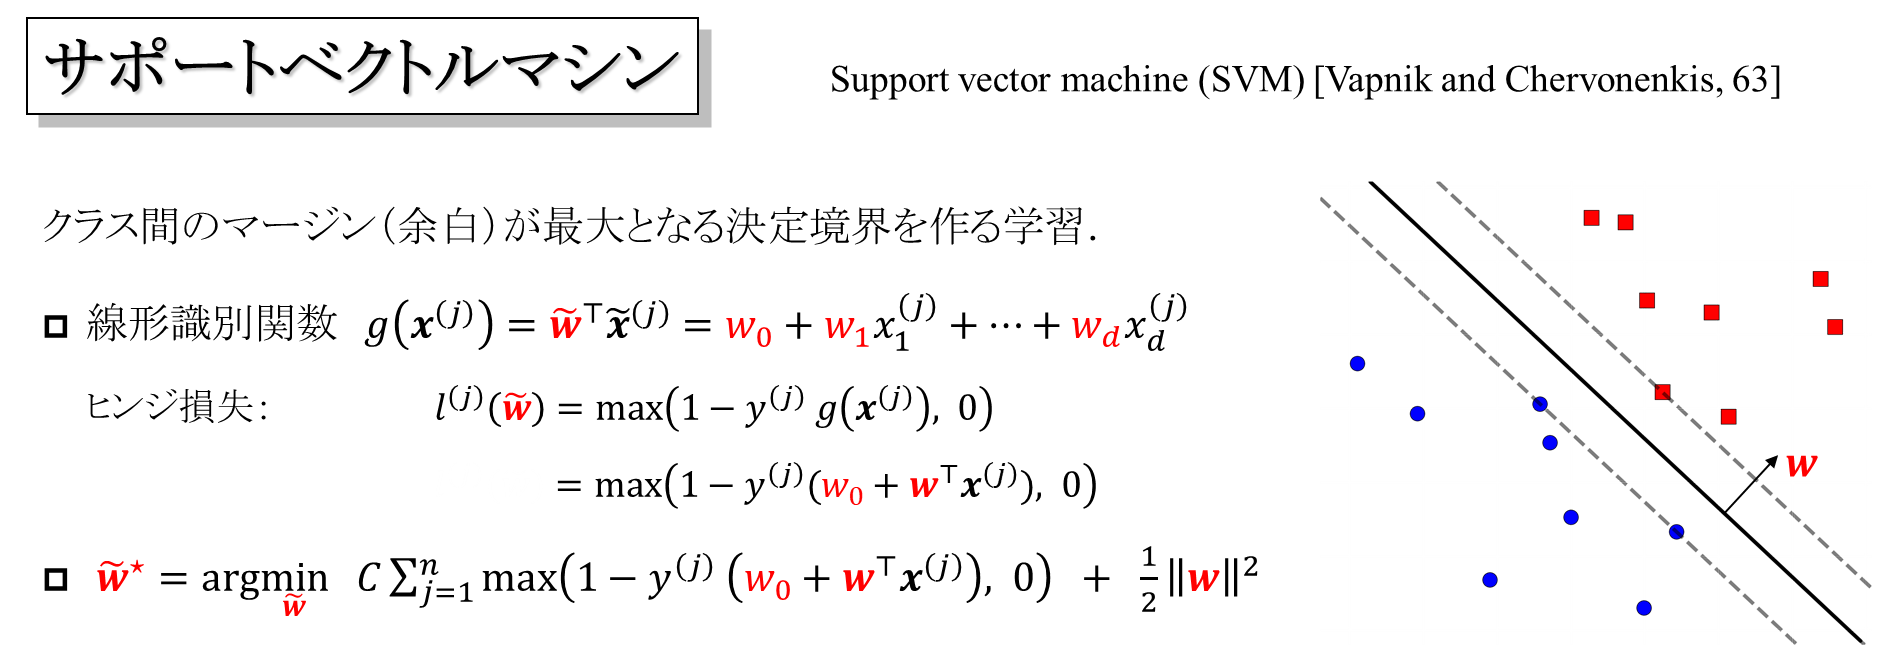

### 補遺：カーネルトリックによる非線形SVM
内積 $\boldsymbol{u}^\top\boldsymbol{v}$ の代わりにガウス核関数 $K(\boldsymbol{u},\boldsymbol{v})=\exp(-\gamma\| \boldsymbol{u}-\boldsymbol{v}\|^2)$ を用いる（`kernel='rbf'`）．
